# Classification (Is your Honey Adulterated?)

# Importing necessary libraries

In [1]:
import os # for file access
import pandas as pd # for data processing
import numpy as np # for math processing

# for plotting
import plotly.express as px

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

np.random.seed(33)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN


# Data Loading

In [3]:

# Load the dataset
#file = ('D:\Research\Honey Adulteration\new\generated_data.xlsx')
file = ('D:\\Research\\Honey Adulteration\\new\\generated_data.xlsx')
df = pd.read_excel(file)
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,C11,2,5,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,C11,2,5,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,C11,2,5,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,C11,2,5,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,C11,2,5,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


# Data Exploration

In [4]:
df['Brand'].value_counts()

Brand
C11    7800
C3     6000
C10    4800
C9     3600
C7     3600
C6     3000
C2     1800
C4     1800
C1     1200
C5      600
C8      600
Name: count, dtype: int64

In [5]:
df['Acquisition'].value_counts()

Acquisition
2    5800
3    5800
1    5800
4    5800
5    5800
6    5800
Name: count, dtype: int64

In [6]:
df['Concentration_Class'].value_counts()

Concentration_Class
5     8700
10    8700
25    8700
50    8700
Name: count, dtype: int64

In [7]:
df['Concentration'].value_counts()

Concentration
5     8700
10    8700
25    8700
50    8700
Name: count, dtype: int64

In [8]:
df['Class'].value_counts()

Class
Rewarewa        3600
ManukaUMF10     3600
Clover          3600
ManukaUMF5      3600
Multifloral     2400
ManukaUMF15     2400
Manuka          1800
Tawari          1800
ManukaBlend     1800
Rata            1200
Kamahi          1200
Pohu            1200
BB              1200
ManukaUMF20     1200
ManukaUMF13      600
BorageField      600
ManukaUMF12      600
ManukaUMF18      600
ManukaUMF22      600
Honeydew         600
Field+Tawari     600
Name: count, dtype: int64

In [9]:
df.shape

(34800, 133)

In [10]:
df.dtypes.value_counts()

float64    128
int64        3
object       2
Name: count, dtype: int64

In [11]:
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,C11,2,5,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,C11,2,5,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,C11,2,5,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,C11,2,5,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,C11,2,5,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


# Data Visualization

Histogram of Concentration

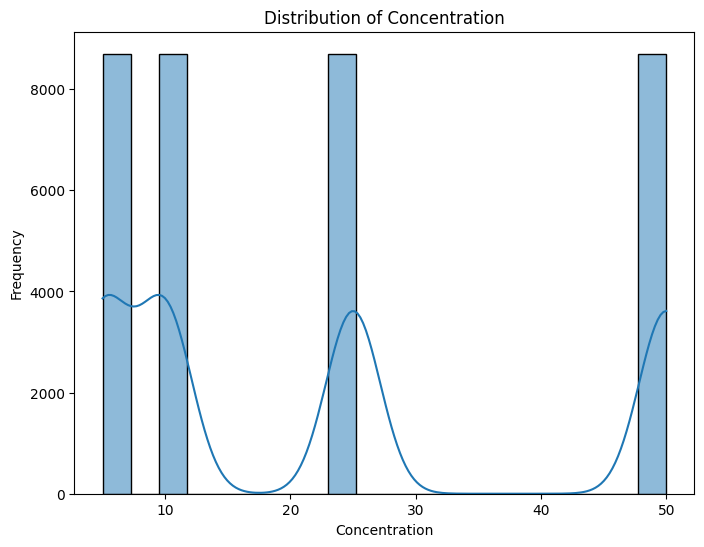

In [12]:
# Import necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of the 'Concentration' column
plt.figure(figsize=(8, 6))
sns.histplot(df['Concentration'], bins=20, kde=True)
plt.title('Distribution of Concentration')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.show()

Pairplot of Numeric Features and class

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


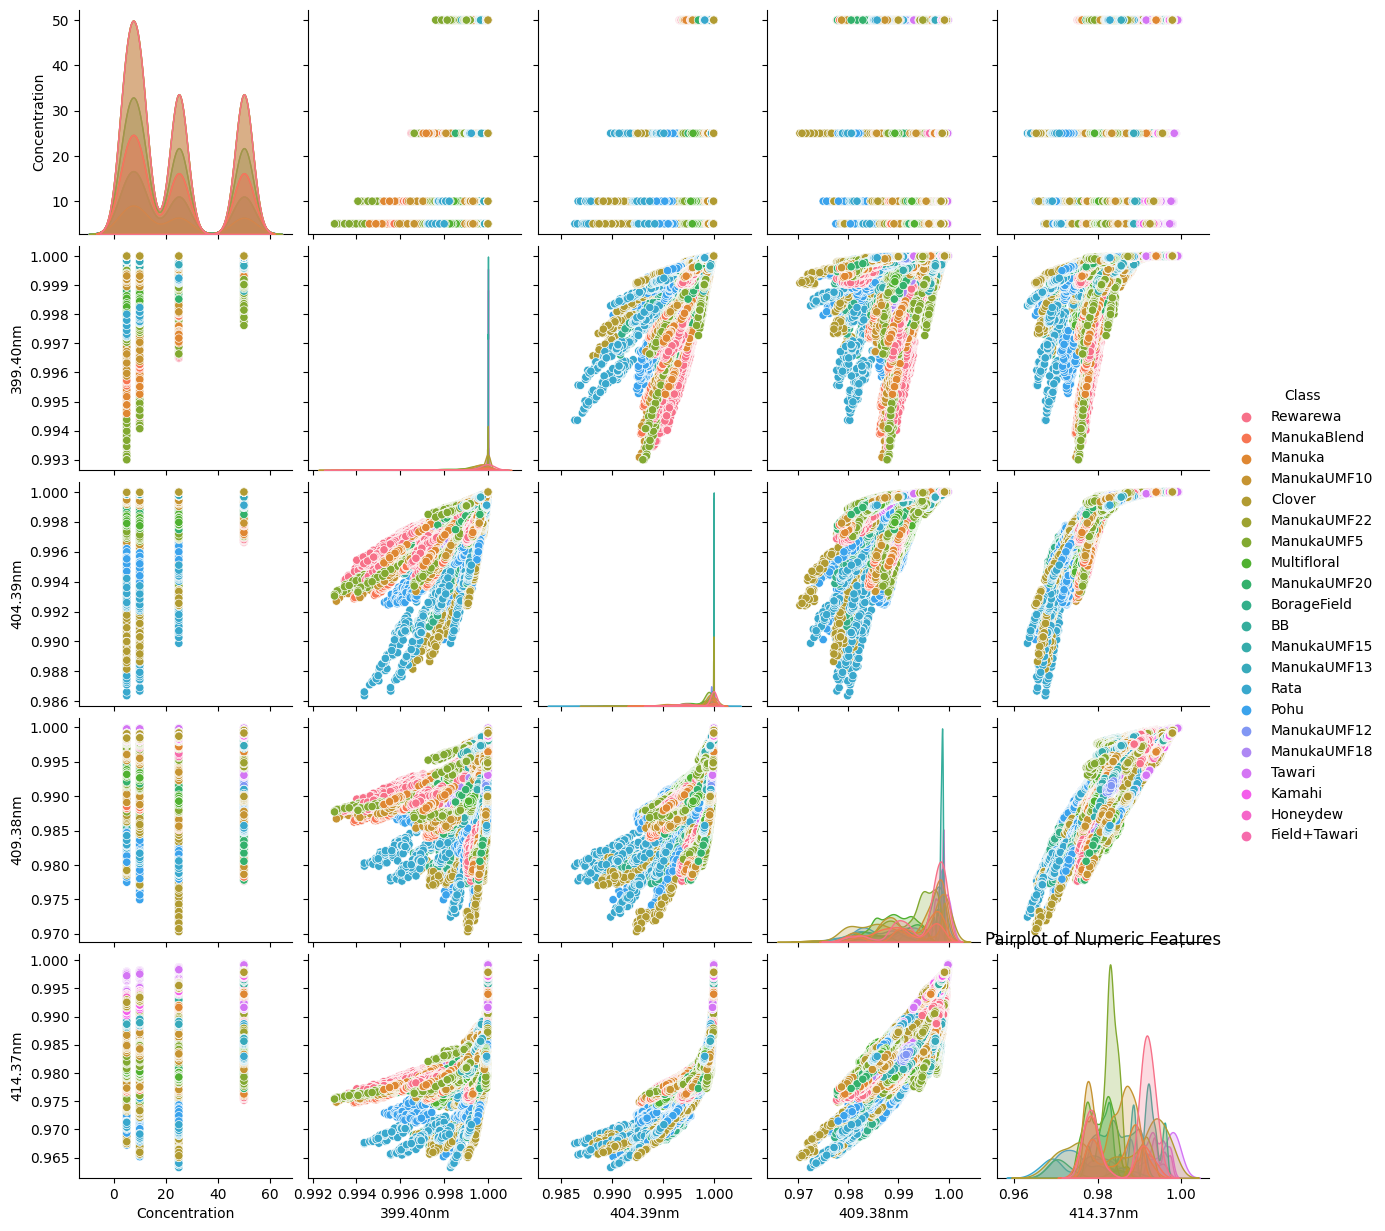

In [13]:
# Create a pairplot to visualize relationships between numeric features
sns.pairplot(df[['Concentration', '399.40nm', '404.39nm', '409.38nm', '414.37nm', 'Class']], hue='Class', diag_kind='kde')
#sns.pairplot(df[['Concentration', '399.40nm']], diag_kind='kde')

plt.title('Pairplot of Numeric Features')
plt.show()

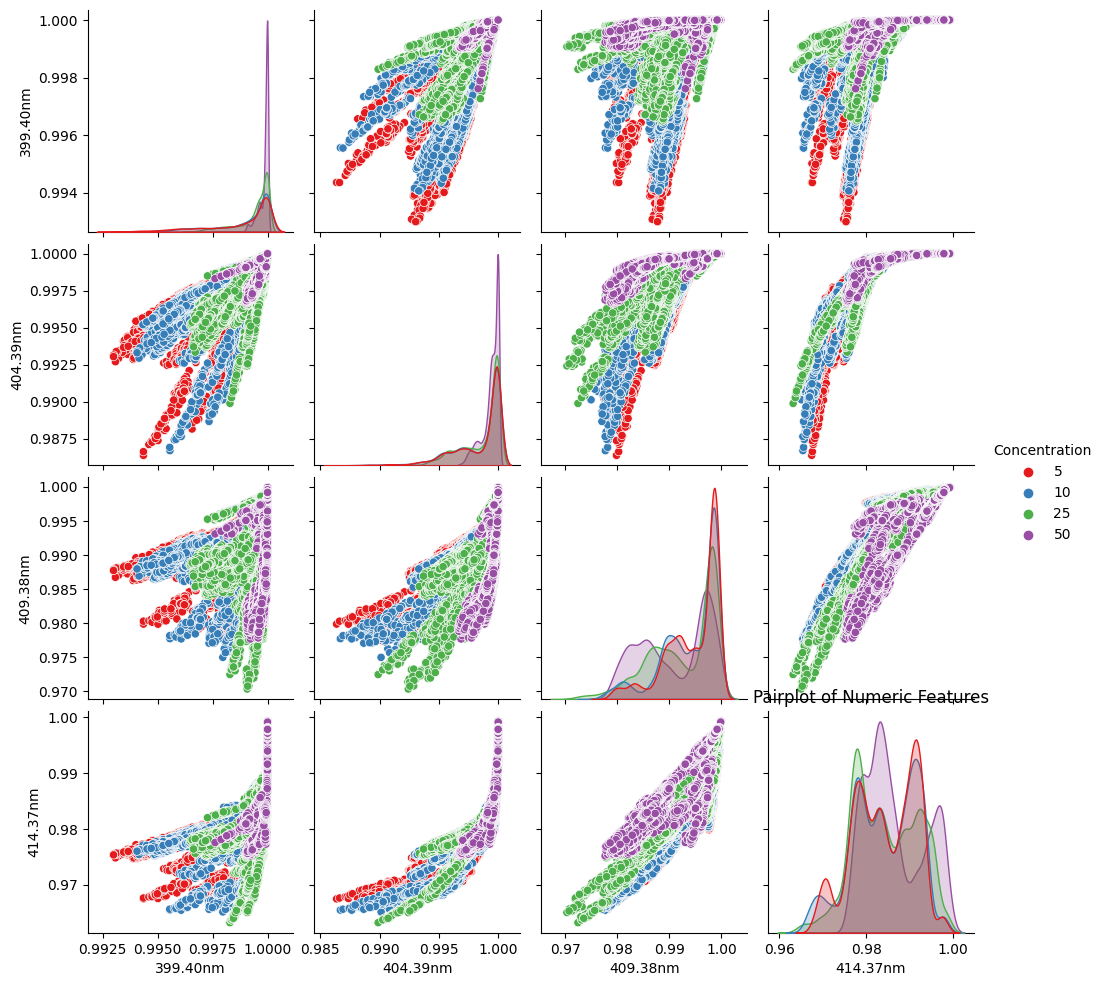

In [14]:
import warnings

# To ignore all warnings, you can use:
warnings.filterwarnings('ignore')

# Define a custom color palette
custom_palette = sns.color_palette("Set1")

# Create a pairplot to visualize relationships between numeric features
sns.pairplot(df[['Concentration', '399.40nm', '404.39nm', '409.38nm', '414.37nm']], hue='Concentration', diag_kind='kde', palette=custom_palette)
#sns.pairplot(df[['Concentration', '399.40nm']], diag_kind='kde')

plt.title('Pairplot of Numeric Features')
plt.show()

Countplot of Brand

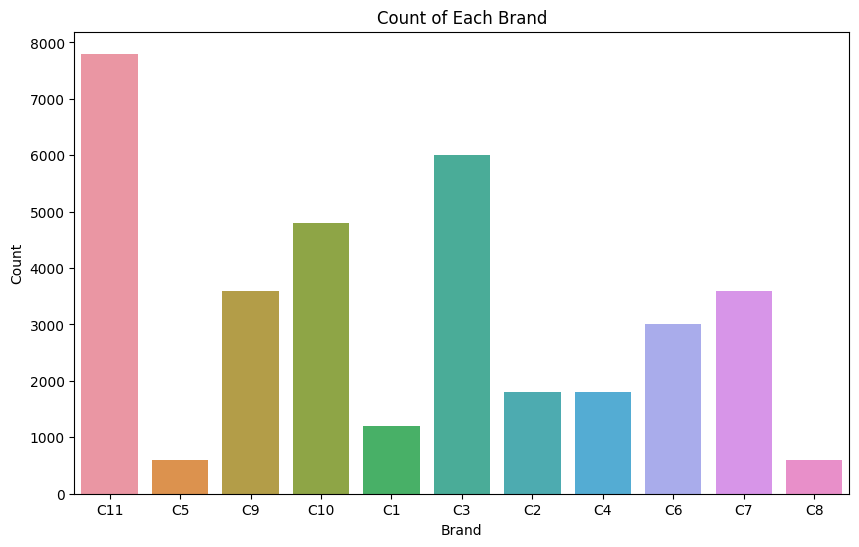

In [15]:
# Create a bar plot to visualize the counts of each 'Brand'
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', data=df)
plt.title('Count of Each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

Countplot of Class

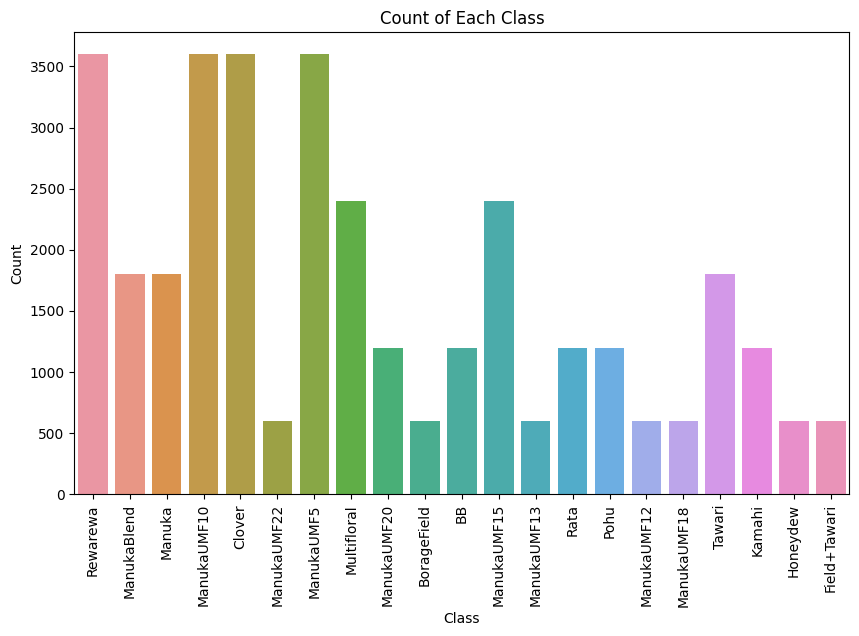

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.show()


Correlation Heatmap

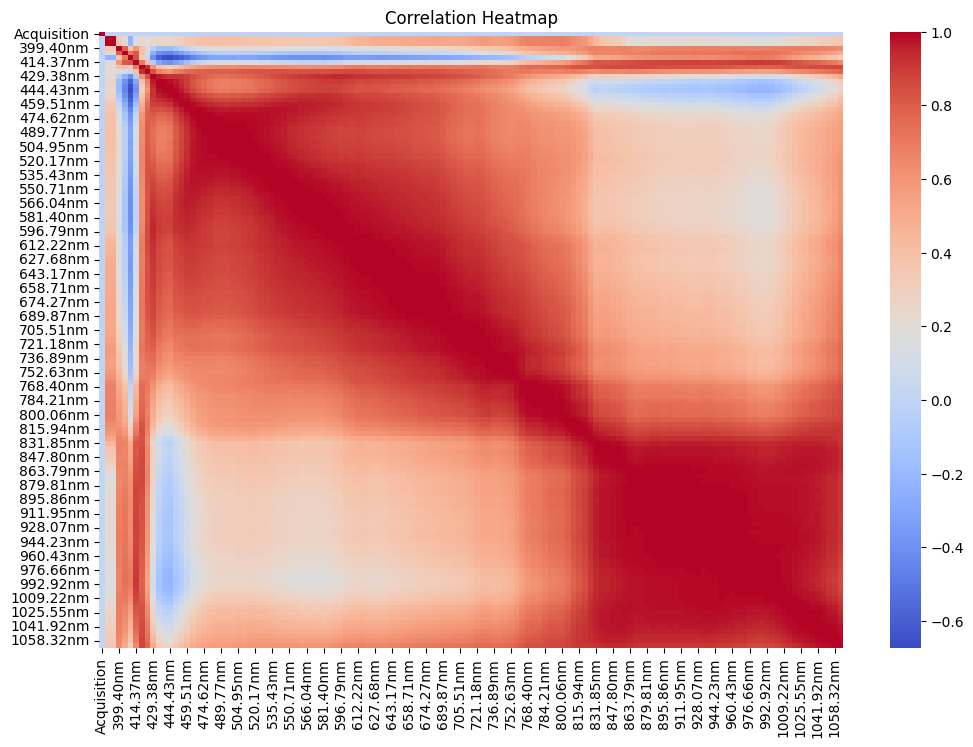

In [17]:
# Select only the numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number])

# Create a heatmap to visualize the correlation between numeric features
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

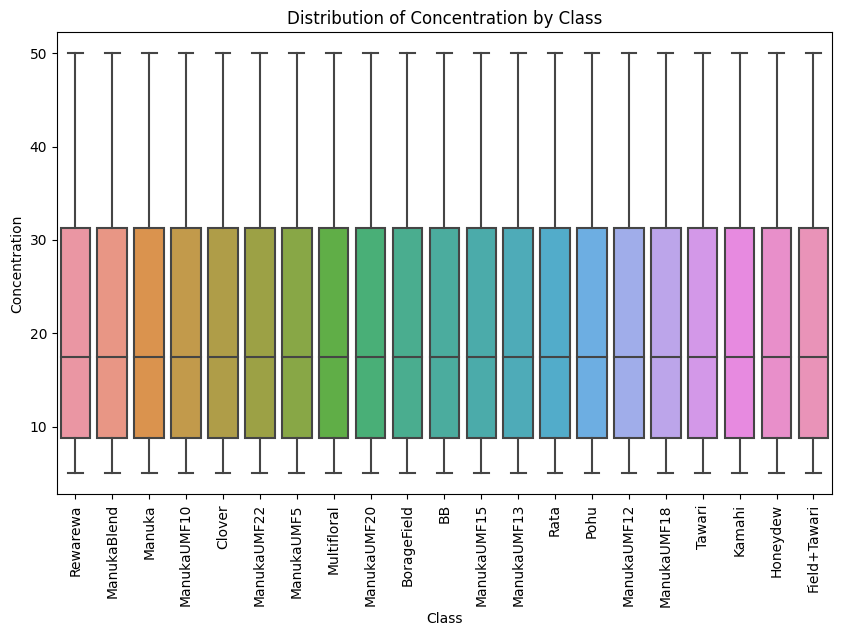

In [18]:
# Create a box plot to visualize the distribution of 'Concentration' for each 'Class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Concentration', data=df)
plt.title('Distribution of Concentration by Class')
plt.xlabel('Class')
plt.ylabel('Concentration')
plt.xticks(rotation=90)
plt.show()

In [19]:
Y=df['Concentration']

In [20]:
Y.head()

0    5
1    5
2    5
3    5
4    5
Name: Concentration, dtype: int64

In [21]:
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,C11,2,5,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,C11,2,5,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,C11,2,5,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,C11,2,5,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,C11,2,5,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


# Data Transformation

Label Encoding for brand

In [22]:
# Define the mapping dictionary
brand_mapping = {
    'C1': 1,
    'C2': 2,
    'C3': 3,
    'C4': 4,
    'C5': 5,
    'C6': 6,
    'C7': 7,
    'C8': 8,
    'C9': 9,
    'C10': 10,
    'C11': 11,
}

# Map the values in the 'Brand' column using the mapping dictionary
df['Brand'] = df['Brand'].map(brand_mapping)

In [23]:
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,11,2,5,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,11,2,5,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,11,2,5,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,11,2,5,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,11,2,5,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


Label Encoding for Class

In [24]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [25]:
# Fit and transform the selected column
df['Class'] = label_encoder.fit_transform(df['Class'])

In [26]:
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,11,2,5,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,19
1,11,2,5,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,19
2,11,2,5,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,19
3,11,2,5,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,19
4,11,2,5,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,19


# Data Cleaning

Dropping Concentration column

In [27]:
df.drop('Concentration',axis=1,inplace=True)

Dropping Concentration_Class column

In [28]:
df.drop('Concentration_Class',axis=1,inplace=True)

In [29]:
X=df

# Splitting the dataset

In [30]:
from sklearn.model_selection import train_test_split

# 7:3

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,shuffle=True)

# Classification Algorithms

# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_only=DecisionTreeClassifier(max_depth=9,max_features=8)
tree_only.fit(X_train,y_train)

y_pred=tree_only.predict(X_test)
accuracy_score(y_test, y_pred)

0.9151340996168582

# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.996743295019157

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

X_test = X_test.values

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9987547892720307

In [35]:
from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           5       1.00      1.00      1.00      2630
          10       1.00      1.00      1.00      2561
          25       1.00      1.00      1.00      2604
          50       1.00      1.00      1.00      2645

    accuracy                           1.00     10440
   macro avg       1.00      1.00      1.00     10440
weighted avg       1.00      1.00      1.00     10440



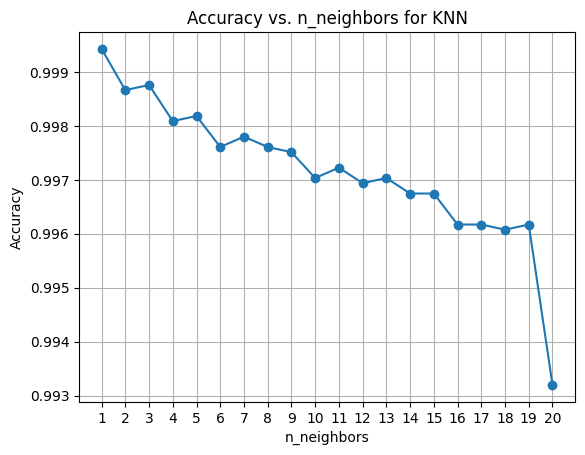

In [36]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Suppress all warnings
warnings.filterwarnings("ignore")

# Initialize lists to store results
n_neighbors_values = []
accuracy_values = []

# Test different values of n_neighbors
for n_neighbors in range(1, 21):
    # Initialize the KNeighborsClassifier with the current n_neighbors value
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy and store the values
    accuracy = accuracy_score(y_test, y_pred)
    n_neighbors_values.append(n_neighbors)
    accuracy_values.append(accuracy)

# Plot the accuracy values
plt.plot(n_neighbors_values, accuracy_values, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_neighbors for KNN')
plt.xticks(n_neighbors_values)
plt.grid()
plt.show()


In [37]:

# # Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)


confusion matrix:
 [[2623    7    0    0]
 [  32 2529    0    0]
 [   0    0 2602    2]
 [   0    0   30 2615]]


Confusion Matrix Visualization

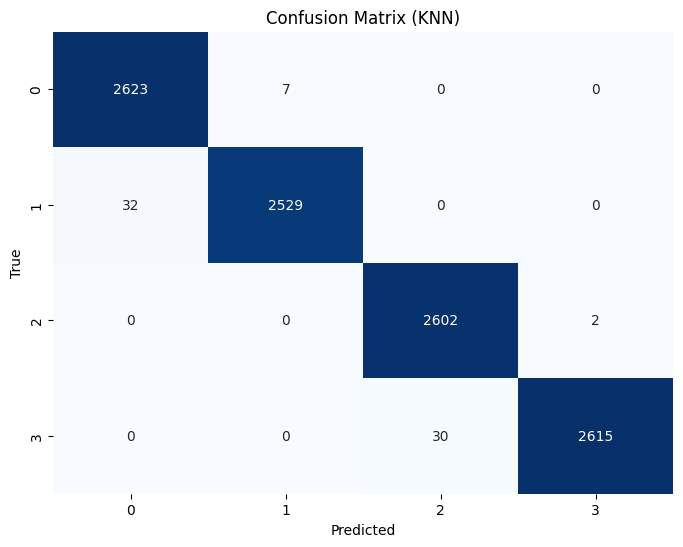

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
# Extract values from the confusion matrix
true_negatives = cm[0, 0]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]


In [40]:

# Calculate False Positive Rate (FPR)
fpr = false_positives / (false_positives + true_negatives)
print("False Positive Rate (FPR):", fpr)

False Positive Rate (FPR): 0.002661596958174905


In [41]:
# Calculate False Negative Rate (FNR)
fnr = false_negatives / (false_negatives + true_positives)
print("False Negative Rate (FNR):", fnr)

False Negative Rate (FNR): 0.012495119094103866


In [42]:
# Calculate Recall (True Positive Rate)
recall = true_positives / (true_positives + false_negatives)
print("Recall:", recall)

Recall: 0.9875048809058962


In [43]:
# Calculate Precision
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)

Precision: 0.9972397476340694


In [44]:
from sklearn.metrics import fbeta_score

# Calculate the F-beta score with the 'macro' average option
beta = 2  # You can adjust the value of beta as needed
f_beta_macro = fbeta_score(y_test, y_pred, beta=beta, average='macro')
print(f"F-beta (beta={beta}, average='macro'):", f_beta_macro)


F-beta (beta=2, average='macro'): 0.9931814227558114


In [45]:

# Calculate Cohen's Kappa
cohen_kappa_score(y_test, y_pred)

0.9909317970058953

In [46]:
# F1-score = 2 * (Precision * Recall) / (Precision + Recall)
F1score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", F1score)

F1-score: 0.992348440258976


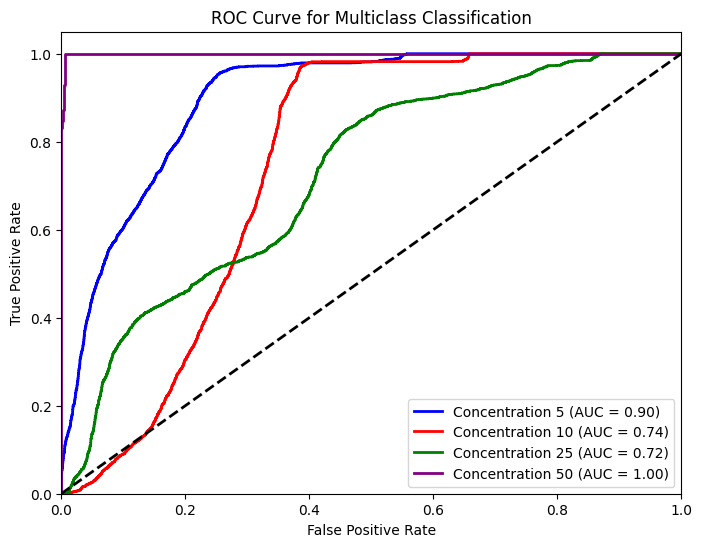

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression

# Binarize the target variable for each class
y_bin = label_binarize(y_test, classes=[5, 10, 25, 50])
n_classes = y_bin.shape[1]

# Initialize a OneVsRestClassifier with an underlying classifier (e.g., Logistic Regression)
classifier = OneVsRestClassifier(LogisticRegression())  # Replace with your chosen classifier

# Fit the classifier for each class
y_score = classifier.fit(X_test, y_bin).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple']  # You can customize colors
concentrations = [5, 10, 25, 50]  # Specify the concentrations
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Concentration {concentrations[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


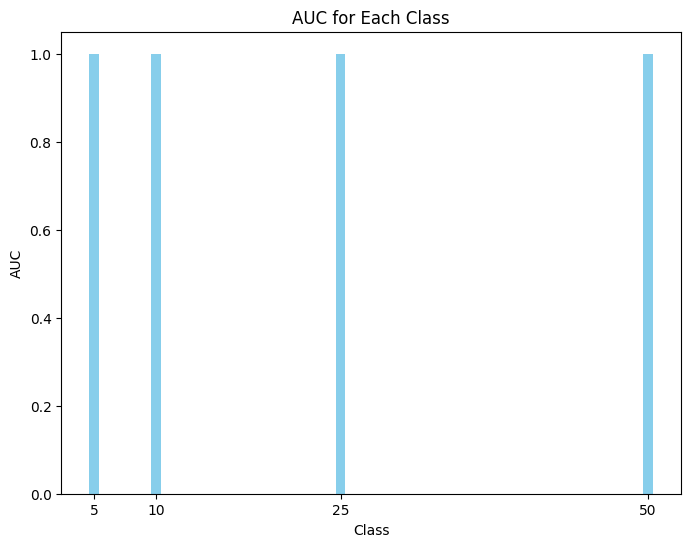

In [48]:
from sklearn.metrics import roc_auc_score

import numpy as np

# Convert X_test to a NumPy array if it's a DataFrame
#if isinstance(X_test, pd.DataFrame):
#    X_testt = X_test.values


# Define the classes for which you want to calculate ROC AUC scores
classes = [5, 10, 25, 50]

# Initialize lists to store AUC values
roc_auc_values = []

# Calculate predicted probabilities for each class
y_probs = clf.predict_proba(X_test)

# Calculate AUC for each class
for class_label in classes:
    # Find the index corresponding to the class label
    class_index = list(clf.classes_).index(class_label)
    
    # Extract the predicted probabilities for the current class
    class_probs = y_probs[:, class_index]
    
    # Calculate ROC AUC for the current class
    auc = roc_auc_score(y_test == class_label, class_probs)
    
    # Append the AUC value to the list
    roc_auc_values.append(auc)

# Plot AUC values
plt.figure(figsize=(8, 6))
plt.bar(classes, roc_auc_values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('AUC')
plt.title('AUC for Each Class')
plt.xticks(classes)
plt.show()


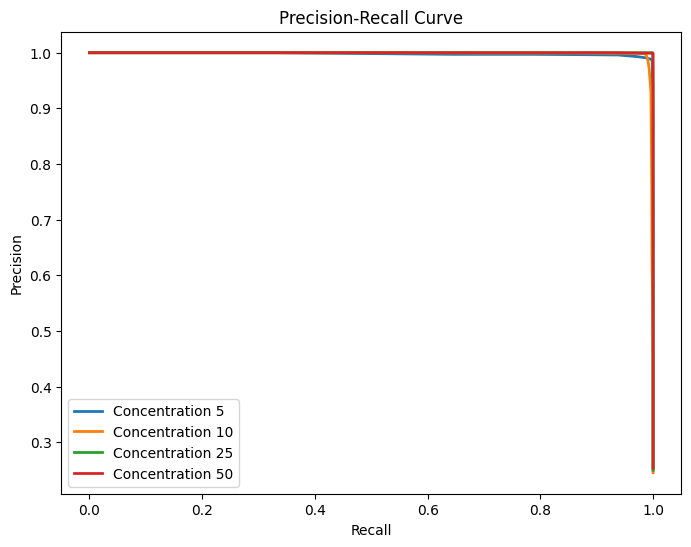

In [49]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for each class
precisions = []
recalls = []
classes = [5, 10, 25, 50]

for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve((y_test == classes[i]).astype(int), y_probs[:, i])
    precisions.append(precision)
    recalls.append(recall)

# Plot PR curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(recalls[i], precisions[i], lw=2, label=f'Concentration {classes[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# SVM Classifier

In [50]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='poly', degree=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6441570881226054

In [51]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[1604  759  261    6]
 [1093  995  419   54]
 [ 329  346 1601  328]
 [   0    7  113 2525]]


In [52]:
# Extract values from the confusion matrix
true_negatives = cm[0, 0]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]

In [53]:
# Calculate False Positive Rate (FPR)
fpr = false_positives / (false_positives + true_negatives)
print("False Positive Rate (FPR):", fpr)

False Positive Rate (FPR): 0.32120186203977996


In [54]:
# Calculate False Negative Rate (FNR)
fnr = false_negatives / (false_negatives + true_positives)
print("False Negative Rate (FNR):", fnr)

False Negative Rate (FNR): 0.5234674329501916


In [55]:
# Calculate Recall (True Positive Rate)
recall = true_positives / (true_positives + false_negatives)
print("Recall:", recall)

Recall: 0.47653256704980845


In [56]:
# Calculate Precision
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)

Precision: 0.5672748004561003


In [57]:
from sklearn.metrics import fbeta_score

# Calculate the F-beta score with the 'macro' average option
beta = 2  # You can adjust the value of beta as needed
f_beta_macro = fbeta_score(y_test, y_pred, beta=beta, average='macro')
print(f"F-beta (beta={beta}, average='macro'):", f_beta_macro)

F-beta (beta=2, average='macro'): 0.6388577139688358


In [58]:
# F1-score = 2 * (Precision * Recall) / (Precision + Recall)
F1score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", F1score)

F1-score: 0.5179593961478397


In [59]:
# Calculate Cohen's Kappa
cohen_kappa_score(y_test, y_pred)

0.5252822228433539

# PCA

In [60]:
from sklearn.decomposition import PCA

pca = PCA(0.9999999)
X_pca = pca.fit_transform(X)
X_pca.shape

(34800, 33)

In [61]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.1, random_state=30)

In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)
y_pred=model.predict(X_test_pca)

In [63]:
model.score(X_test_pca, y_test)

0.7936781609195402

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (DecisionTree)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [24360, 31320]

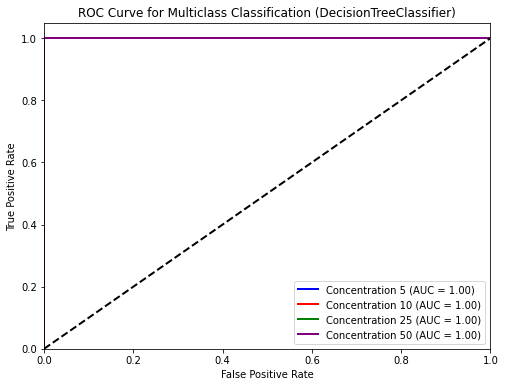

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Binarize the target variable for each class
y_bin = label_binarize(y_test, classes=[5, 10, 25, 50])
n_classes = y_bin.shape[1]

# Initialize a OneVsRestClassifier with DecisionTreeClassifier as the underlying classifier
classifier = OneVsRestClassifier(RandomForestClassifier())

# Fit the classifier for each class
y_score = classifier.fit(X_test, y_bin).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple']  # You can customize colors
concentrations = [5, 10, 25, 50]  # Specify the concentrations
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Concentration {concentrations[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (DecisionTreeClassifier)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

import numpy as np

# Convert X_test to a NumPy array if it's a DataFrame
#if isinstance(X_test, pd.DataFrame):
#    X_testt = X_test.values


# Define the classes for which you want to calculate ROC AUC scores
classes = [5, 10, 25, 50]

# Initialize lists to store AUC values
roc_auc_values = []

# Calculate predicted probabilities for each class
y_probs = clf.predict_proba(X_test)

# Calculate AUC for each class
for class_label in classes:
    # Find the index corresponding to the class label
    class_index = list(clf.classes_).index(class_label)
    
    # Extract the predicted probabilities for the current class
    class_probs = y_probs[:, class_index]
    
    # Calculate ROC AUC for the current class
    auc = roc_auc_score(y_test == class_label, class_probs)
    
    # Append the AUC value to the list
    roc_auc_values.append(auc)

# Plot AUC values
plt.figure(figsize=(8, 6))
plt.bar(classes, roc_auc_values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('AUC')
plt.title('AUC for Each Class')
plt.xticks(classes)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for each class
precisions = []
recalls = []
classes = [5, 10, 25, 50]

for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve((y_test == classes[i]).astype(int), y_probs[:, i])
    precisions.append(precision)
    recalls.append(recall)

# Plot PR curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(recalls[i], precisions[i], lw=2, label=f'Concentration {classes[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Decision Tree

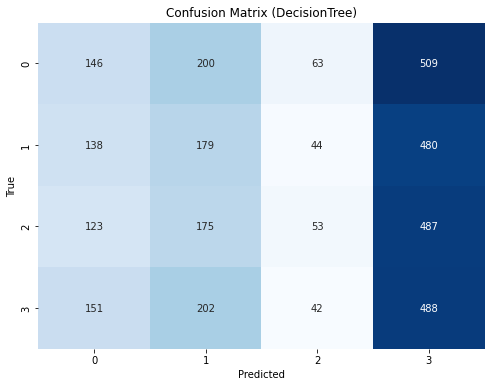

In [ ]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_only=DecisionTreeClassifier(max_depth=9,max_features=8)
tree_only.fit(X_train,y_train)

y_pred=tree_only.predict(X_test)
accuracy_score(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (DecisionTree)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

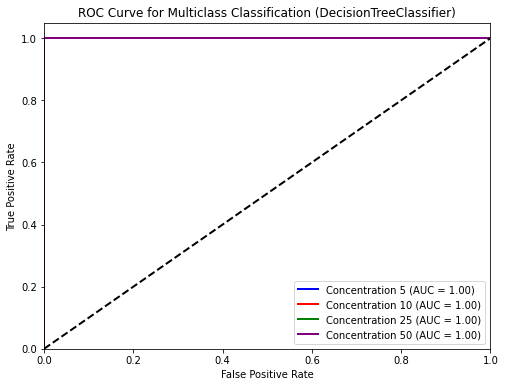

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier

# Binarize the target variable for each class
y_bin = label_binarize(y_test, classes=[5, 10, 25, 50])
n_classes = y_bin.shape[1]

# Initialize a OneVsRestClassifier with DecisionTreeClassifier as the underlying classifier
classifier = OneVsRestClassifier(DecisionTreeClassifier())

# Fit the classifier for each class
y_score = classifier.fit(X_test, y_bin).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple']  # You can customize colors
concentrations = [5, 10, 25, 50]  # Specify the concentrations
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Concentration {concentrations[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (DecisionTreeClassifier)')
plt.legend(loc="lower right")
plt.show()

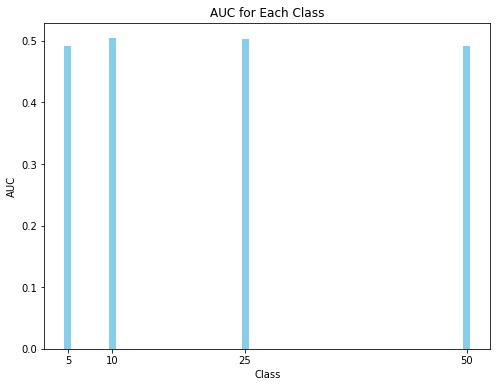

In [ ]:
from sklearn.metrics import roc_auc_score

import numpy as np

# Convert X_test to a NumPy array if it's a DataFrame
#if isinstance(X_test, pd.DataFrame):
#    X_testt = X_test.values


# Define the classes for which you want to calculate ROC AUC scores
classes = [5, 10, 25, 50]

# Initialize lists to store AUC values
roc_auc_values = []

# Calculate predicted probabilities for each class
y_probs = tree_only.predict_proba(X_test)

# Calculate AUC for each class
for class_label in classes:
    # Find the index corresponding to the class label
    class_index = list(clf.classes_).index(class_label)
    
    # Extract the predicted probabilities for the current class
    class_probs = y_probs[:, class_index]
    
    # Calculate ROC AUC for the current class
    auc = roc_auc_score(y_test == class_label, class_probs)
    
    # Append the AUC value to the list
    roc_auc_values.append(auc)

# Plot AUC values
plt.figure(figsize=(8, 6))
plt.bar(classes, roc_auc_values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('AUC')
plt.title('AUC for Each Class')
plt.xticks(classes)
plt.show()

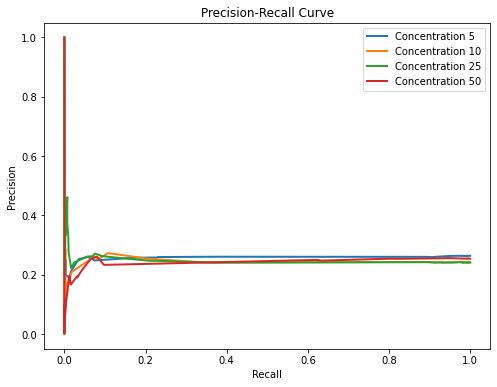

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for each class
precisions = []
recalls = []
classes = [5, 10, 25, 50]

for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve((y_test == classes[i]).astype(int), y_probs[:, i])
    precisions.append(precision)
    recalls.append(recall)

# Plot PR curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(recalls[i], precisions[i], lw=2, label=f'Concentration {classes[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()